In [1]:
#Create time-related features

    #Examine whether the bicycle count shows any time-related patterns.
    #Extract features like hour, month etc. from the datetime column.
    #Plot small sections of the data (1 day, 1 week etc.)
    #Group by a time feature and observe grouped means


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
sns.set_style("darkgrid")

In [3]:
df=pd.read_csv('train.csv')

df['datetime'] = pd.to_datetime(df['datetime'])

df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
df.shape

(10886, 12)

In [6]:
df.head(10886 )

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


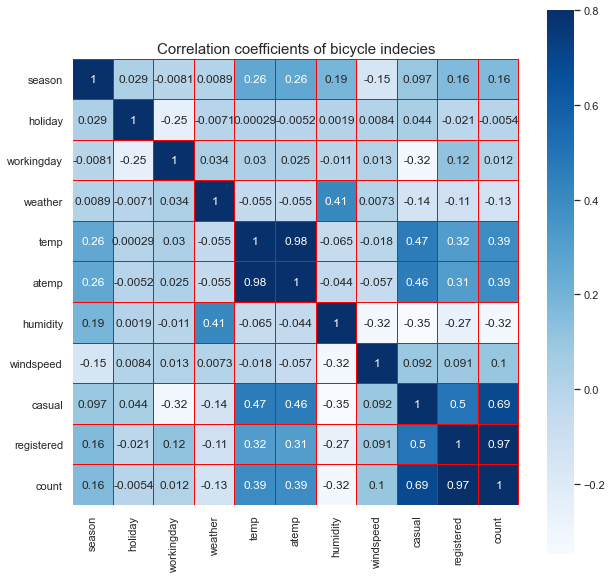

In [7]:
# Compute the correlation coefficient to know extract the most inportant index

# Correlation matrix

dt_Corr = df[['season', 'holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered', 'count']]

dt_Cor=dt_Corr .corr(method ='pearson')

#dt_Cor.style.background_gradient(cmap='red').set_precision(2)

plt.figure(figsize=(10, 10))
sns.heatmap(dt_Cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Blues',linecolor="red")

plt.title('Correlation coefficients of bicycle indecies',fontsize=15);

In [8]:
# Since we have relatively have correlation coefficients in 4 variables, hence we focus on 4 for now.

df['date'] = [d.date() for d in df['datetime']]
df['Hrs'] = [d.time() for d in df['datetime']]


In [9]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,Hrs
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


In [10]:
#df.drop(['datetime'], axis=1).head(5)

In [11]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
date                  object
Hrs                   object
dtype: object

In [12]:
df['date']= pd.to_datetime(df['date']) 

In [13]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
date          datetime64[ns]
Hrs                   object
dtype: object

In [14]:
df.set_index(df['date'], inplace=True)


In [15]:
df.head(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,Hrs
date,,,,,,,,,,,,,,
2011-01-01,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
2011-01-01,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2011-01-01,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
2011-01-01,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00


In [16]:
New_df=df.drop(['datetime','season','holiday','workingday','weather','humidity','windspeed','date','Hrs'], axis=1)

New_df2=df.drop(['datetime','season','holiday','workingday','weather','humidity','windspeed','date'], axis=1)


In [17]:
New_df.head(4)

#df.rolling('10D').mean()

,temp,atemp,casual,registered,count
date,,,,,
2011-01-01,9.84,14.395,3,13,16
2011-01-01,9.02,13.635,8,32,40
2011-01-01,9.02,13.635,5,27,32
2011-01-01,9.84,14.395,3,10,13


In [18]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 to 2012-12-19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        10886 non-null  float64
 1   atemp       10886 non-null  float64
 2   casual      10886 non-null  int64  
 3   registered  10886 non-null  int64  
 4   count       10886 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 510.3 KB


Text(0.5, 0, 'Unsurvived / Survived')

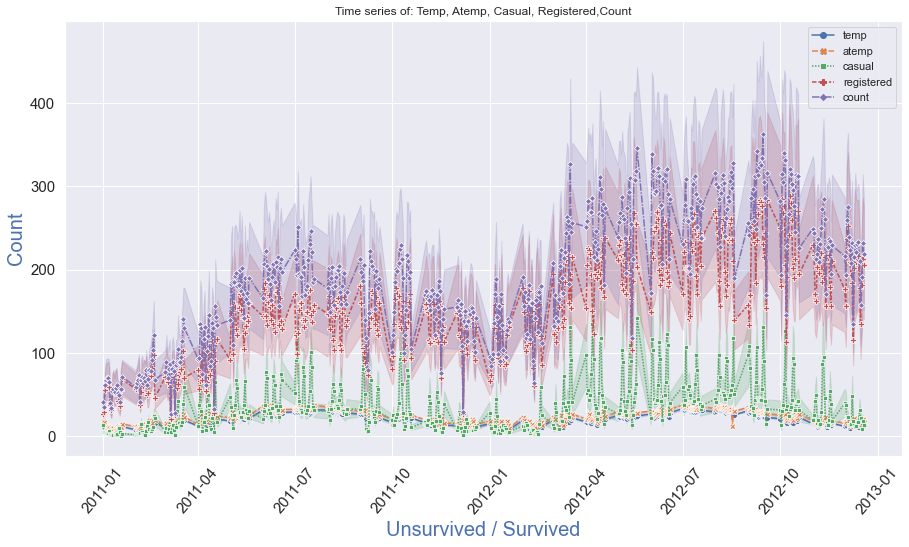

In [19]:
plt.figure(figsize=(15,8))
sns.lineplot(data=New_df, markers=True)

plt.xticks(rotation=50)
plt.ylabel('Count',fontsize=20,color='b')
plt.xlabel('Date [Year]',fontsize=20,color='b')

plt.title('Time series of: Temp, Atemp, Casual, Registered,Count')

#plt.show()

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)



In [20]:
Day_max=New_df.resample('10D').max()

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

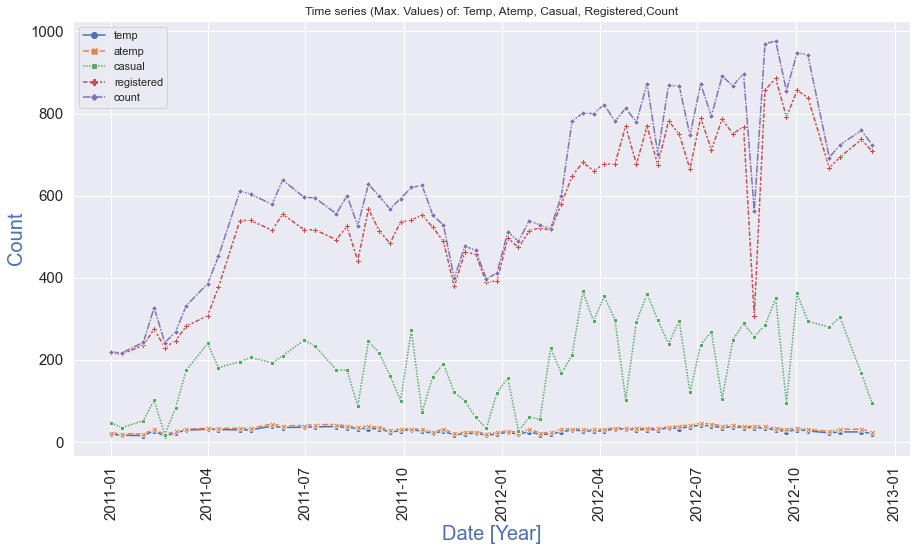

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(data=Day_max, markers=True)

plt.xticks(rotation=90)

plt.ylabel('Count',fontsize=20,color='b')
plt.xlabel('Date [Year]',fontsize=20,color='b')

plt.title('Time series (Max. Values) of: Temp, Atemp, Casual, Registered,Count')

#plt.show()

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

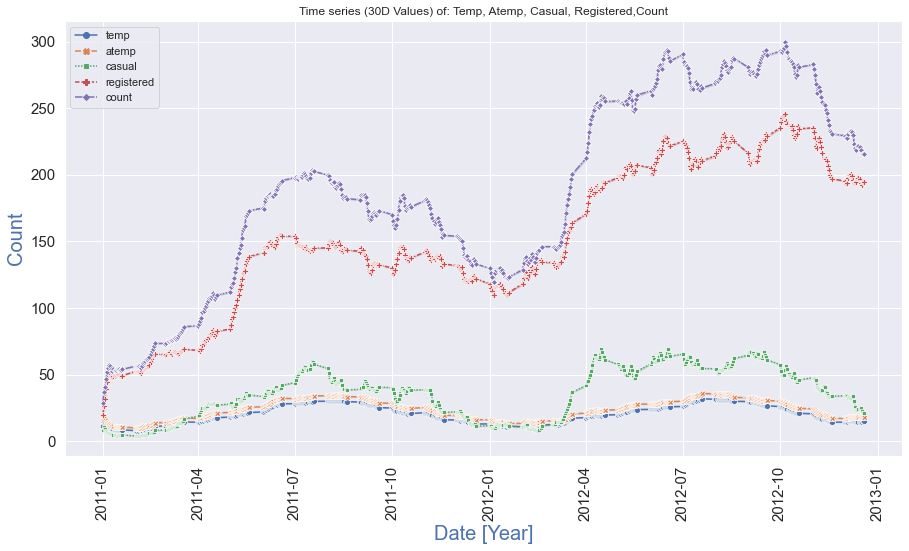

In [22]:
Day_mean=New_df.rolling('30D').mean()

plt.figure(figsize=(15,8))
sns.lineplot(data=Day_mean, markers=True)

plt.xticks(rotation=90)

plt.ylabel('Count',fontsize=20,color='b')
plt.xlabel('Date [Year]',fontsize=20,color='b')

plt.title('Time series (30D Values) of: Temp, Atemp, Casual, Registered,Count')

# plt.show()

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [23]:

New_df2.head(4)
New_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 to 2012-12-19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        10886 non-null  float64
 1   atemp       10886 non-null  float64
 2   casual      10886 non-null  int64  
 3   registered  10886 non-null  int64  
 4   count       10886 non-null  int64  
 5   Hrs         10886 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 595.3+ KB


In [85]:
df2 = pd.read_csv('train.csv', parse_dates=True)

import datetime

df2['datetime'] = pd.to_datetime(df2['datetime'])
df2['year'] = df2['datetime'].dt.year
df2['month'] = df2['datetime'].dt.month_name()
df2['day'] = df2['datetime'].dt.day
df2['dayofweek'] = df2['datetime'].dt.dayofweek
df2['hour'] = df2['datetime'].dt.hour
df2['date'] = df2['datetime'].dt.date

df2 = df2.drop(['datetime'],axis=1)

df2.head(130)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour,date
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,1,5,0,2011-01-01
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,1,5,1,2011-01-01
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,1,5,2,2011-01-01
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,1,5,3,2011-01-01
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,1,5,4,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,0,1,1,9.02,12.880,44,6.0032,2,57,59,2011,January,6,3,11,2011-01-06
126,1,0,1,1,10.66,14.395,35,0.0000,6,78,84,2011,January,6,3,12,2011-01-06
127,1,0,1,1,10.66,13.635,35,7.0015,12,55,67,2011,January,6,3,13,2011-01-06
128,1,0,1,1,11.48,13.635,36,11.0014,11,59,70,2011,January,6,3,14,2011-01-06


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  object 
 13  day         10886 non-null  int64  
 14  dayofweek   10886 non-null  int64  
 15  hour        10886 non-null  int64  
 16  date        10886 non-null  object 
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


Text(0.5, 0, 'UT [Hr]')

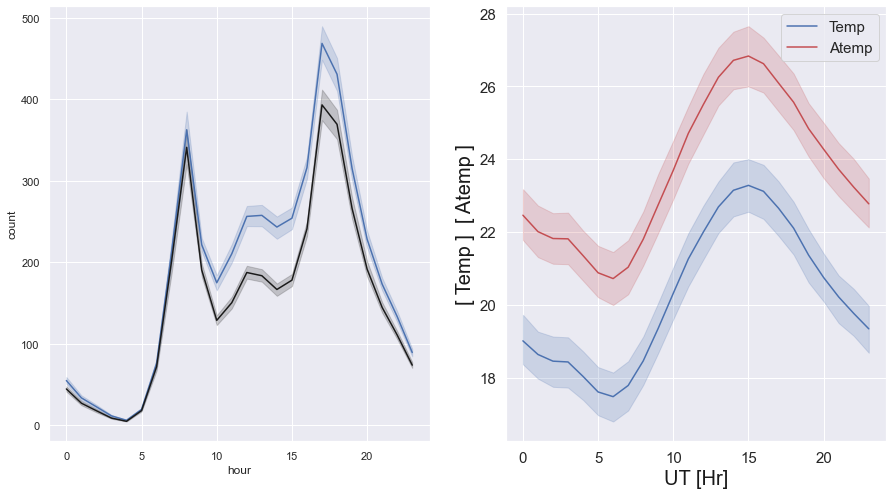

In [26]:
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#df2['background'] = arr

sns.lineplot(data=df2, x="hour", y="count", color='b',ax=axes[0])
sns.lineplot(data=df2, x="hour", y="registered", color='k',ax=axes[0])
plt.legend(['Count', 'Reg'],fontsize = 15)
plt.ylabel('[ Count ]  [ Reg ]',fontsize=20,color='k')
plt.xlabel('UT [Hr]',fontsize=20,color='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# second plot on the right

sns.lineplot(data=df2, x="hour", y="temp", color='b',ax=axes[1])
sns.lineplot(data=df2, x="hour", y="atemp", color='r',ax=axes[1])

plt.legend(['Temp', 'Atemp'],fontsize = 15)

plt.ylabel('[ Temp ]  [ Atemp ]',fontsize=20,color='k')
plt.xlabel('UT [Hr]',fontsize=20,color='k')



(array([16., 18., 20., 22., 24., 26., 28., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

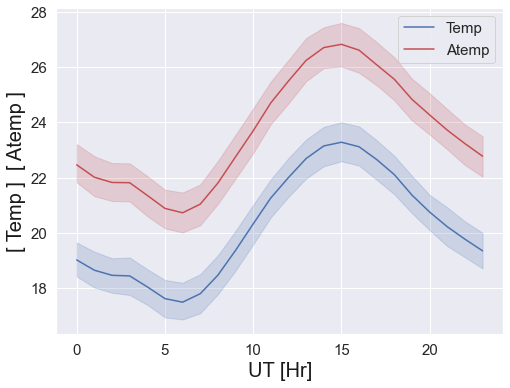

In [27]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

ax = sns.lineplot(data=df2, x="hour", y="temp", color='b')
arr = np.ones(len(df2))

df2['background'] = arr

sns.lineplot(data=df2, x="hour", y="atemp", color='r')

plt.ylabel('[ Temp ]  [ Atemp ]',fontsize=20,color='k')
plt.xlabel('UT [Hr]',fontsize=20,color='k')
plt.legend(['Temp', 'Atemp'],fontsize = 15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)



(array([ 75., 100., 125., 150., 175., 200., 225., 250., 275.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

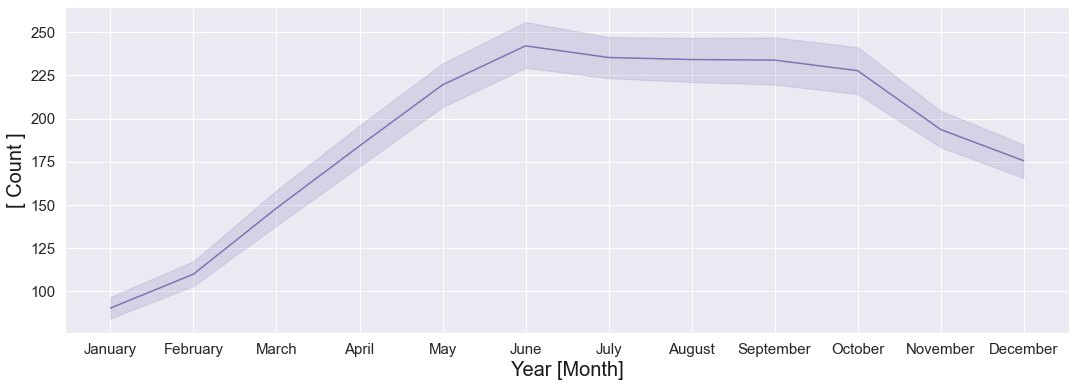

In [28]:
plt.figure(figsize=(18,6))

ax = sns.lineplot(data=df2, x="month", y="count", color='m')
arr = np.ones(len(df2))

df2['background'] = arr

plt.ylabel('[ Count ]',fontsize=20,color='k')
plt.xlabel('Year [Month]',fontsize=20,color='k')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)



C:\Users\seun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

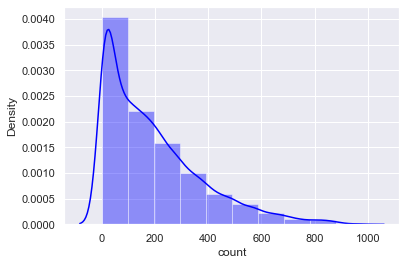

In [29]:
sns.set_style('darkgrid')
sns.distplot(df2['count'],bins=10,color='blue')
plt.show



<AxesSubplot:xlabel='count'>

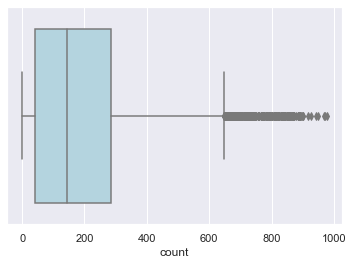

In [30]:
sns.boxplot(x='count',data=df2,color='lightblue')



['atemp', 'humidity', 'windspeed', 'casual', 'registered']


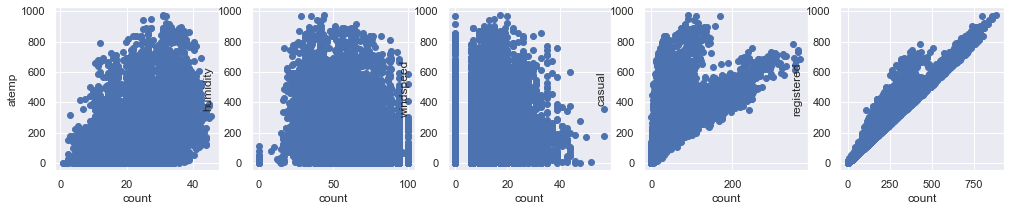

In [31]:
fields=[f for f in df2]
fields=fields[5:-8]
print(fields)

fig=plt.figure(figsize=(17,3))

for i,f in enumerate(fields):
    px=fig.add_subplot(1,5,i+1)
    px.scatter(df2[f],df2['count'],color='b')
    px.set_ylabel(f)
    px.set_xlabel('count')
plt.show()

<Figure size 432x288 with 0 Axes>

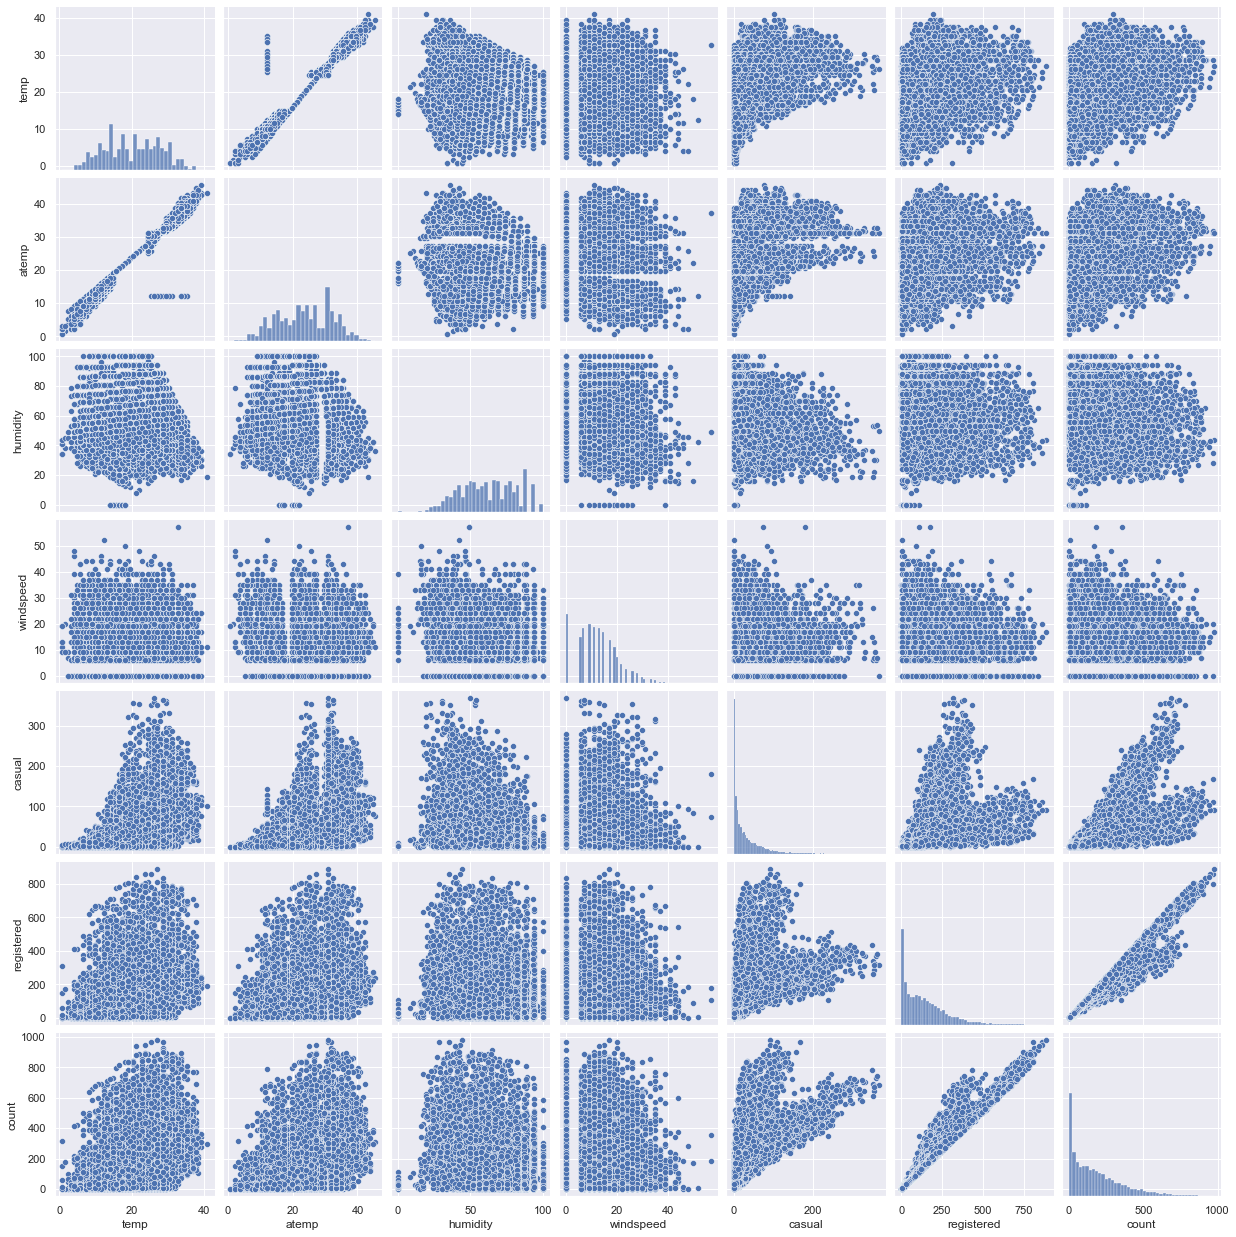

In [32]:
numerical_rep = df2[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
plt.figure()
sns.pairplot(numerical_rep)
plt.show()

<AxesSubplot:xlabel='weather', ylabel='count'>

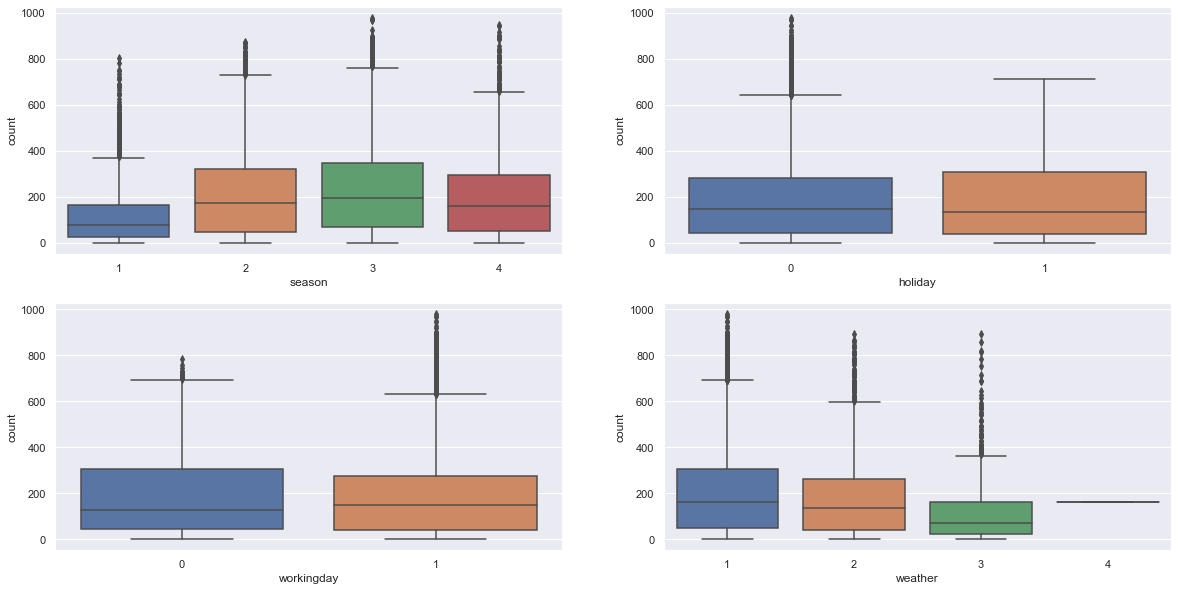

In [33]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)

train=df2

sns.boxplot(data=train,y='count',x='season',ax=axes[0][0])
sns.boxplot(data=train,y='count',x='holiday',ax=axes[0][1])
sns.boxplot(data=train,y='count',x='workingday',ax=axes[1][0])
sns.boxplot(data=train,y='count',x='weather',ax=axes[1][1])



(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

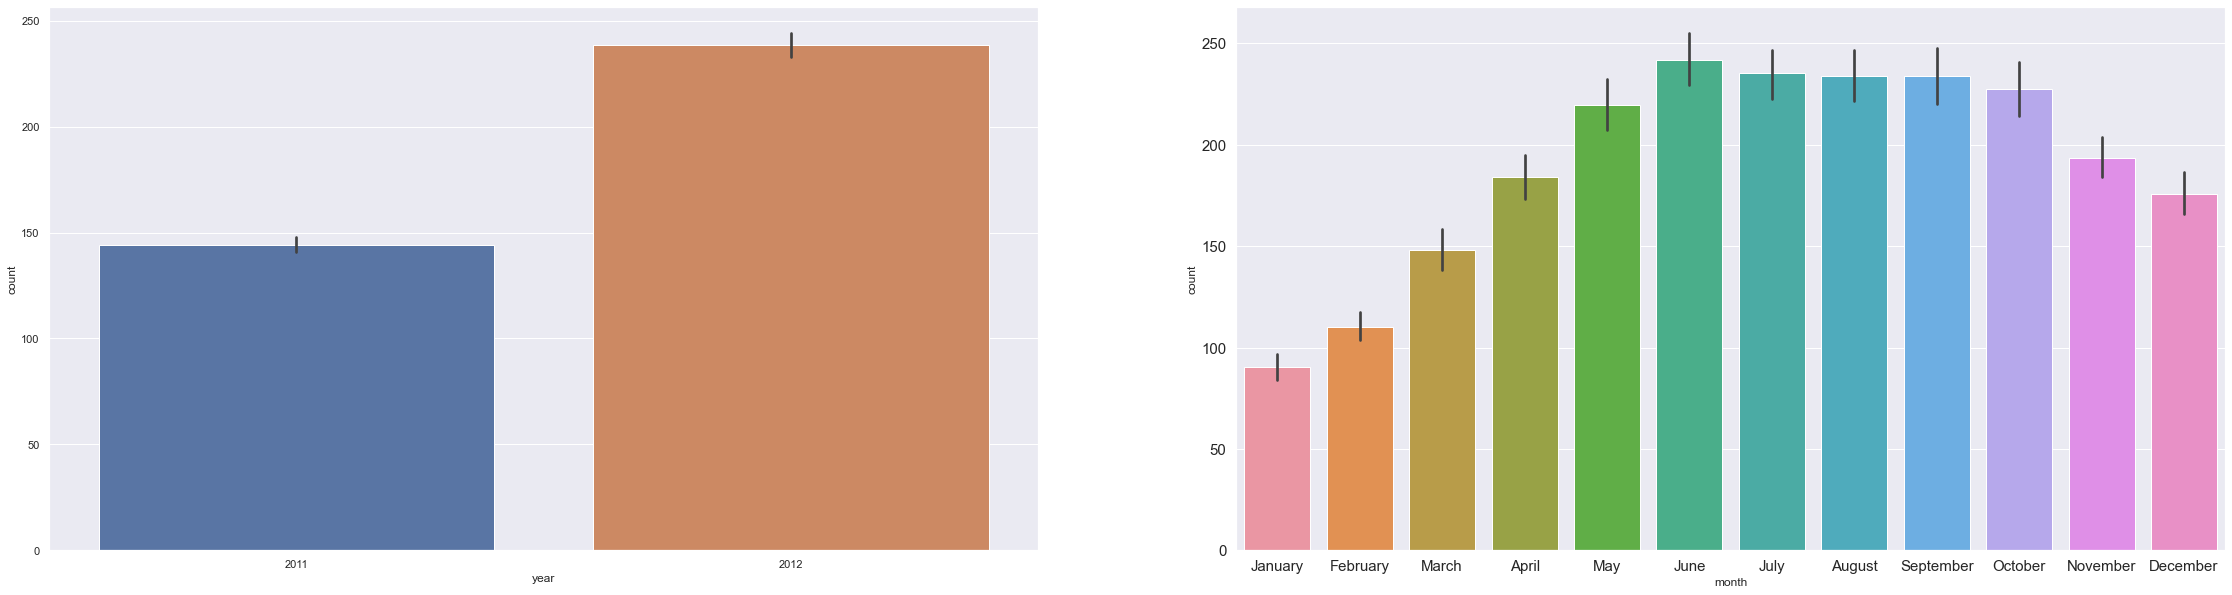

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2)

fig.set_size_inches(39,10)


train=df2

sns.barplot(data=train,x='year',y='count',ax=axes[0])

sns.barplot(data=train,x='month',y='count',ax=axes[1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

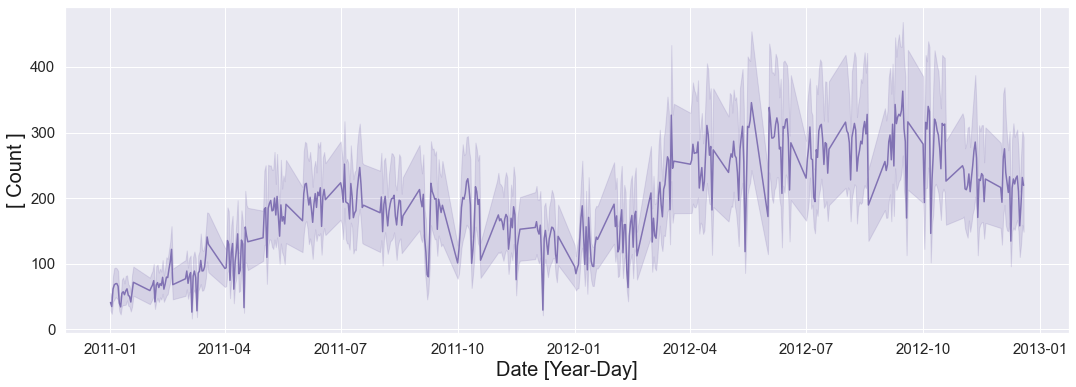

In [35]:
plt.figure(figsize=(18,6))

ax = sns.lineplot(data=df2, x="date", y="count", color='m')
arr = np.ones(len(df2))

df2['background'] = arr

plt.ylabel('[ Count ]',fontsize=20,color='k')
plt.xlabel('Date [Year-Day]',fontsize=20,color='k')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [269]:
M=pd.value_counts(df2.month)
M

December     912
May          912
July         912
August       912
June         912
November     911
October      911
September    909
April        909
February     901
March        901
January      884
Name: month, dtype: int64

In [107]:

#To extraxt 2011 data 

year_2011_data= df2[(df2.year == 2011)]
count_2011=year_2011_data['count'].sum()



year_2012_data= df2[(df2.year == 2012)]
count_2012=year_2012_data['count'].sum()

year_2013_data= df2[(df2.year == 2013)]
count_2013=year_2013_data['count'].sum()

In [37]:
df2.year.unique()



array([2011, 2012], dtype=int64)

In [268]:
import random 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



# Train a Regression model

   # First, create a data points for X and y

In [274]:
X = df2[['season', 'holiday','workingday','weather','temp','humidity','windspeed','hour']]
y = df2["count"]

# Train test split X and y data

In [275]:
# Create training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8708, 8), (2178, 8), (8708,), (2178,))

In [276]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   hour        10886 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 680.5 KB


In [277]:
X['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

# Applying Feature Engineering

In [278]:
# now we have to treat categorical columns and numerical columns differently and seprately

categorical_feature_mask = X.dtypes==object
categorical_features = X.columns[categorical_feature_mask].tolist()
print(categorical_features)


numeric_feature_mask = X.dtypes!=object
numeric_features = X.columns[numeric_feature_mask].tolist()
print(numeric_features)

[]
['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'hour']


In [279]:
df2.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
dayofweek     0
hour          0
date          0
dtype: int64

In [280]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Now we define the steps we need to do for both groups of columns
# Drop imputer since there is No missing values in the coloumns

## categorical_steps = [#('imputer', SimpleImputer(strategy='most_frequent')),
                    ## ('onehot', OneHotEncoder(handle_unknown='ignore'))]

## categorical_transformer = Pipeline(categorical_steps)

## numeric_steps = [#('imputer', SimpleImputer(strategy='mean')), 
            ##     ('poly',PolynomialFeatures(degree=2)),
             ##    ('scaler', StandardScaler()),

##]

## numeric_transformer  = Pipeline(numeric_steps)

In [348]:

F_transformation = ColumnTransformer(
    [
        
        
        ("encoder1", OneHotEncoder(handle_unknown="ignore", sparse=False), ["weather",'holiday', 'workingday',"season"]),
        
        ('poly',PolynomialFeatures(degree=8), ["temp","hour"]),
        ("scaler1", StandardScaler(), ['humidity', 'windspeed']),
                
    ]
)

 

In [349]:
F_transformation.fit_transform(X_train)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.90625000e+05,  1.09855333e+00, -8.28356194e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.29496730e+09, -1.18269379e+00,  8.78554595e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.56289062e+09, -1.07900074e+00,  5.12496178e-01],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.29496730e+09, -7.16075058e-01,  5.12496178e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.76480100e+06, -2.32331734e+00,  2.70802959e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         5.76480100e+06,  1.35778596e+00,  2.46906533e-02]])

In [350]:
X_train_Transform = F_transformation.fit_transform(X_train)

In [351]:
X_train_Transform=pd.DataFrame(X_train_Transform)

X_train_Transform

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,6.546654e+10,1.174077e+10,2.105590e+09,3.776166e+08,6.772177e+07,1.214522e+07,2.178125e+06,3.906250e+05,1.098553,-0.828356
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.490406e+12,6.462464e+11,2.802153e+11,1.215026e+11,5.268403e+10,2.284403e+10,9.905268e+09,4.294967e+09,-1.182694,0.878555
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,6.126440e+11,2.801725e+11,1.281277e+11,5.859498e+10,2.679648e+10,1.225449e+10,5.604187e+09,2.562891e+09,-1.079001,0.512496
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,6.104702e+08,1.654391e+08,4.483444e+07,1.215026e+07,3.292752e+06,8.923447e+05,2.418278e+05,6.553600e+04,1.617019,-0.706609
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,6.691706e+08,5.100386e+08,3.887489e+08,2.963025e+08,2.258403e+08,1.721344e+08,1.312000e+08,1.000000e+08,-0.871615,0.512496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.045579e+06,3.187741e+05,9.718723e+04,2.963025e+04,9.033613e+03,2.754150e+03,8.396800e+02,2.560000e+02,-0.767922,-0.218804
8704,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.365025e+08,1.854114e+08,1.453573e+08,1.139561e+08,8.933841e+07,7.003882e+07,5.490848e+07,4.304672e+07,-0.042070,0.756807
8705,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4.204489e+08,5.859915e+08,8.167128e+08,1.138276e+09,1.586447e+09,2.211076e+09,3.081639e+09,4.294967e+09,-0.716075,0.512496
8706,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.559805e+09,7.008108e+08,3.148701e+08,1.414692e+08,6.356127e+07,2.855769e+07,1.283080e+07,5.764801e+06,-2.323317,2.708030


In [352]:
X_test_Transform = F_transformation.transform(X_test)
X_test_Transform = pd.DataFrame(X_test_Transform)
X_test_Transform

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,5.340435e+11,1.747317e+11,5.716979e+10,1.870517e+10,6.120072e+09,2.002403e+09,6.551587e+08,2.143589e+08,-0.145763,-1.560473
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.168526e+05,1.710038e+05,2.502494e+05,3.662186e+05,5.359297e+05,7.842874e+05,1.147738e+06,1.679616e+06,-0.404996,-0.828356
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.607823e+08,2.941139e+08,5.380133e+08,9.841707e+08,1.800312e+09,3.293254e+09,6.024245e+09,1.101996e+10,-0.716075,0.024691
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.953505e+11,6.617564e+10,2.241722e+10,7.593909e+09,2.572463e+09,8.714304e+08,2.952000e+08,1.000000e+08,0.009776,0.024691
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.577454e+11,1.427279e+11,1.291401e+11,1.168459e+11,1.057221e+11,9.565730e+10,8.655066e+10,7.831099e+10,-0.456842,0.512496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,7.310244e+10,5.225994e+10,3.735993e+10,2.670811e+10,1.909326e+10,1.364952e+10,9.757854e+09,6.975757e+09,-0.664229,0.756807
2174,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,2.676682e+08,8.160617e+07,2.487993e+07,7.585344e+06,2.312605e+06,7.050625e+05,2.149581e+05,6.553600e+04,0.217162,1.122866
2175,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4.467196e+09,3.813460e+09,3.255392e+09,2.778994e+09,2.372312e+09,2.025144e+09,1.728781e+09,1.475789e+09,-1.130847,0.024691
2176,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.313903e+08,5.722573e+07,2.492410e+07,1.085544e+07,4.727981e+06,2.059225e+06,8.968750e+05,3.906250e+05,0.994860,-0.706609


In [353]:
# Fit the F_transformation to the train data

# TRANS=F_transformation.fit(X_train)

In [354]:
# X_Transformed=TRANS.transform(X_train)

In [355]:
Predictor=LinearRegression()

In [356]:
Predictor.fit(X_train_Transform,y_train)

LinearRegression()

In [357]:
Predictions=Predictor.predict(X_test_Transform)

In [358]:
Predictor.score(X_train_Transform,y_train)

0.6139797325270611

In [359]:
Predictor.score(X_test_Transform,y_test)

0.6097903408332115

In [ ]:
#X = pd.DataFrame(New_df)